# SECONDA SIMULAZIONE DI RICHARDS CON WHETGEO1D
    -Author: Niccolò Tubini, Concetta D'Amato and Riccardo Rigon
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
-----
This code allows to plot the output of WHETGEO 1D by reading the netDCF output file of your simulation.<br>

Per la seconda simulazione di Richards si è deciso di analizzare due tipi di precipitazione su una colonna di suolo a fondo <b>permeabile</b> di questa composizione:<br><ul> <li>loam per $0 \leq z \leq -1$ metri;</li> <li>sandy loam per $-1\leq z\leq -3$ metri;</li><li>clay per $-3\leq z\leq -6$ metri.</li></ul>
La falda è stata impostata a -6m.<br>

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import matplotlib.style as style 
from matplotlib import rc
import xarray as xr
import datetime

####### Plot settings #######
nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.3,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())
project_path

'C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students'

## Import your NetCDF file

In [5]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\output')
os.listdir()

['.DS_Store',
 'Integrate PDE',
 'WHETGEO_1205_0000.nc',
 'WHETGEO_1205_2_0000.nc',
 'WHETGEO_1305_0000.nc',
 'WHETGEO_1305_es2_0000.nc',
 'WHETGEO_bomba01_0000.nc',
 'WHETGEO_bomba01_new_0000.nc',
 'WHETGEO_bomba02_0000.nc',
 'WHETGEO_bomba03_0000.nc',
 'WHETGEO_bomba04_0000.nc',
 'WHETGEO_doppiofrontizio_0000.nc',
 'WHETGEO_doppiofrontizio_1perm_0000.nc',
 'WHETGEO_doppiofrontizio_2perm_0000.nc',
 'WHETGEO_doppiofrontizio_3imp_0000.nc',
 'WHETGEO_doppiofrontizio_4perm_0000.nc',
 'WHETGEO_frontizio01_0000.nc',
 'WHETGEO_frontizio02_0000.nc',
 'WHETGEO_frontizio03_0000.nc',
 'WHETGEO_frontizio04_0000.nc']

In [6]:
file_name = 'WHETGEO_doppiofrontizio_2perm_0000.nc'

In [7]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:        (depth: 81, dualDepth: 81, time: 2208)
Coordinates:
  * depth          (depth) float64 -5.925 -5.775 -5.625 ... -0.05 -0.01667 0.0
  * dualDepth      (dualDepth) float64 -6.0 -5.85 -5.7 ... -0.06667 -0.03333 0.0
  * time           (time) datetime64[ns] 2020-06-01 ... 2020-08-31T23:00:00
Data variables:
    psi            (time, depth) float64 ...
    psiIC          (depth) float64 ...
    T              (depth) float64 ...
    theta          (time, depth) float64 ...
    darcyVelocity  (time, dualDepth) float64 ...
    waterVolume    (time, depth) float64 ...
    error          (time) float64 ...
    topBC          (time) float64 ...
    bottomBC       (time) float64 ...
    runOff         (time) float64 ...
    controlVolume  (depth) float64 ...
Attributes:
    Description_of_the_problem:         grid:  data/Grid_NetCDF/Richards_coup...
    Top_boundary_condition:              
    Bottom_boundary_condition:           
    path_top_boundary_conditio

## Precipitation Timeseries

In [8]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\data\\Timeseries')
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'All_0.csv',
 'All_0_2020.csv',
 'bomba_10mm.csv',
 'data.csv',
 'doppiofrontizio.csv',
 'frontizio_01mm.csv',
 'LAI_sin.csv',
 'Prec.csv',
 'Prec_out_13.csv',
 'Prec_out_5m.csv',
 'prova.csv',
 'save.csv',
 'save15.csv',
 'savees.csv']

In [9]:
file_name = 'doppiofrontizio.csv' 

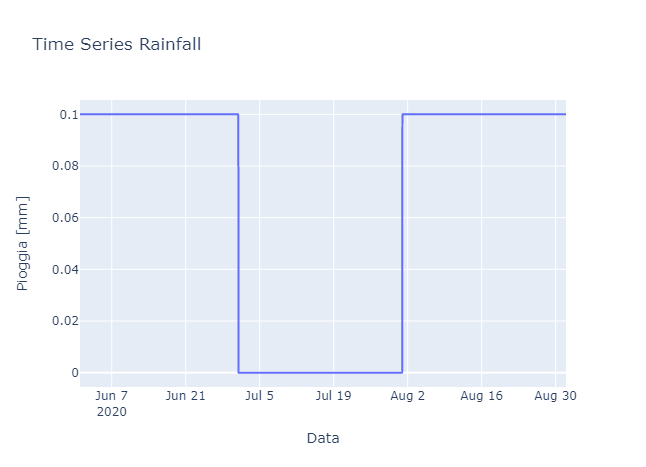

In [10]:
kl = pd.read_csv(file_name,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Data'
kl.columns.values[1] = 'Pioggia [mm]' 
fig = px.line(kl, x='Data', y='Pioggia [mm]', title='Time Series Rainfall')
fig.show()

## Plot water suction $\psi$

 ### Intial condition for water suction $\psi$

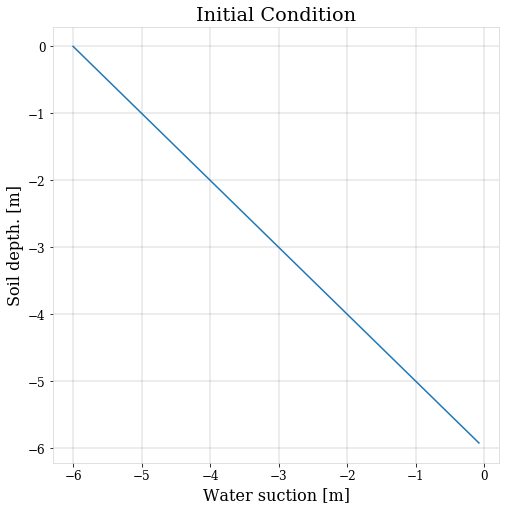

In [11]:
fig = plt.figure(figsize=(8,13/1.62))
ds.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]') 
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

 ### Water suction $\psi$ among the soil depth in your simulation 
 
Nel seguente grafico notiamo come al 01/06/2020 la suzione a partire dallo strato di argilla  aumenta fino a 2m perchè inizialmente l’acqua viene rallentata dallo strato di argilla.
Si può inoltre notare che negli strati più superficiali si intervalla una zona più scura tra due zone chiare, proprio in corrispondenza ai due eventi di precipitazione

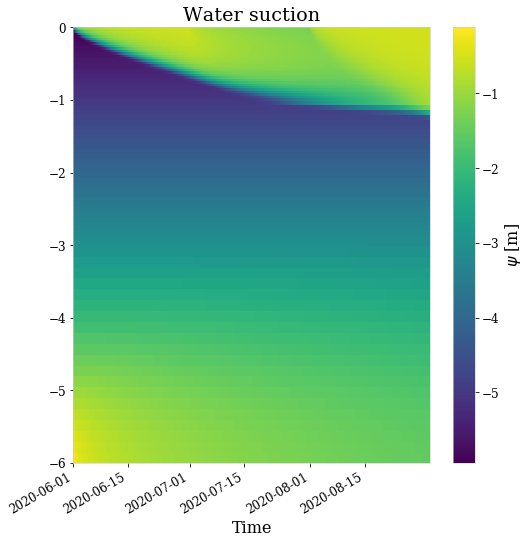

In [12]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')

Con il passare dei giorni la $\psi$ diminuisce sul fondo della colonna di suolo a causa dell'infiltrazione dell'acqua verso il basso.

## Plot water content  $\theta$

 ### Water content $\theta$ among the soil depth in your simulation
 
Osservando gli andamenti del contenuto d’acqua si può notare come nello strato più superficiale di terriccio il $\theta$ dal primo all’ultimo luglio è minore (ovvero più scuro) rispetto ai $\theta$ di giugno e agosto.<br>

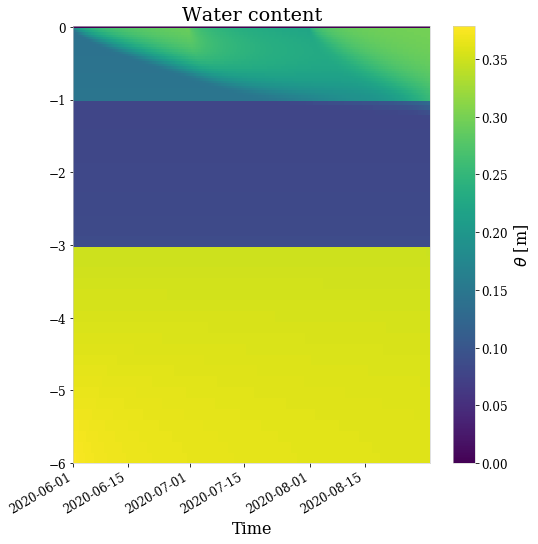

In [13]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')

### Plot specifical depth
Define a vector of depth 'myDepth' you would plot 

In [14]:
myDepth = [-0.1,-1.0,-3,-6]

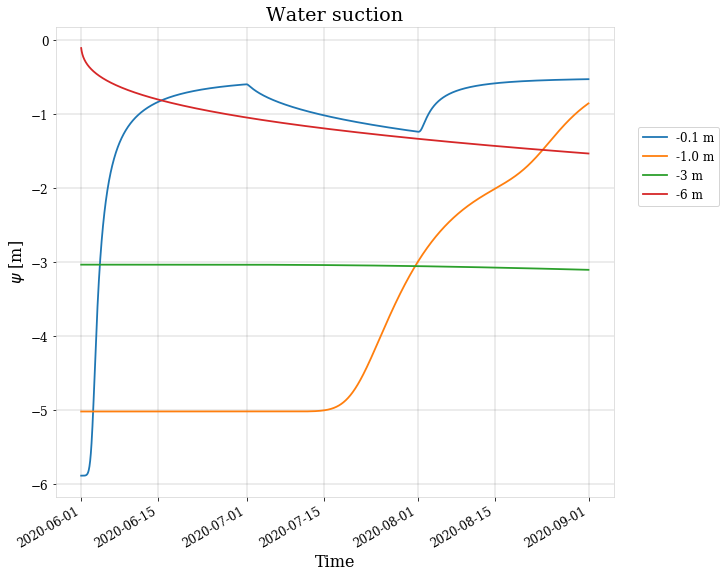

In [15]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.psi.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

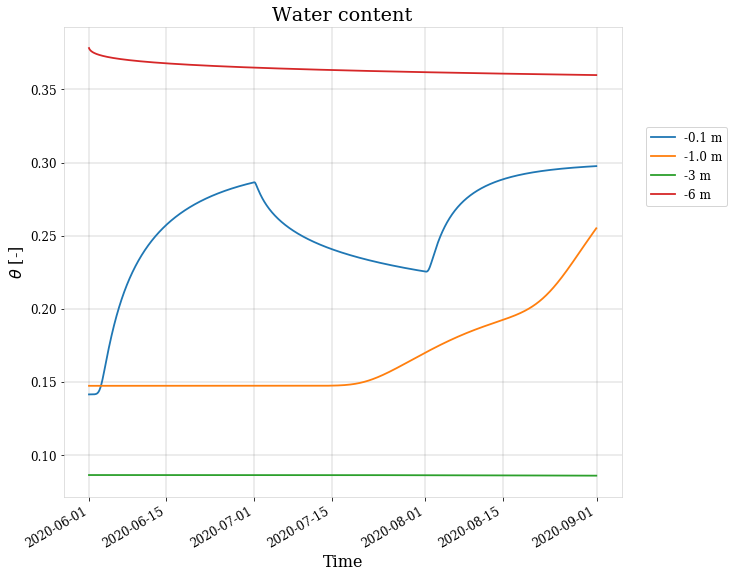

In [16]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.theta.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\\theta$ [-]')
plt.xlabel('Time')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [17]:
myDate = ['2020-06-01 00:00:00','2020-06-30 00:00:00','2020-08-01 00:00:00','2020-08-31 00:00:00']

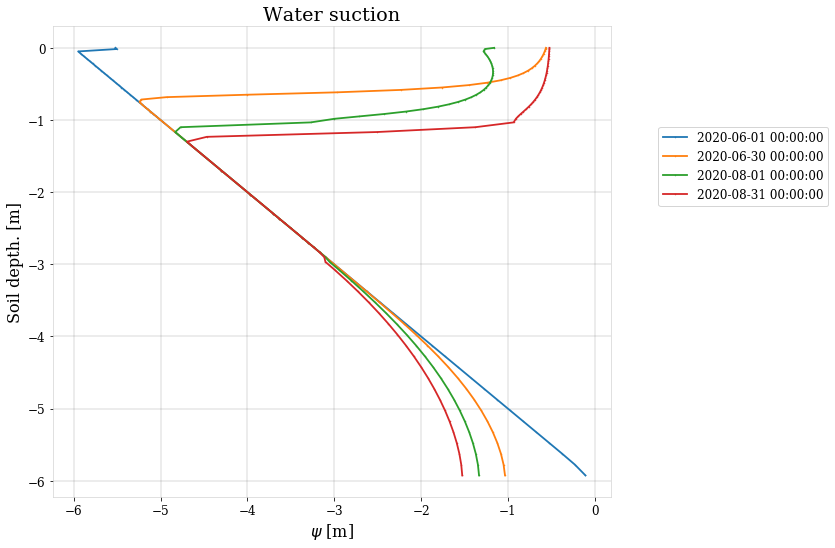

In [18]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.psi.sel(time=myDate[i],).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

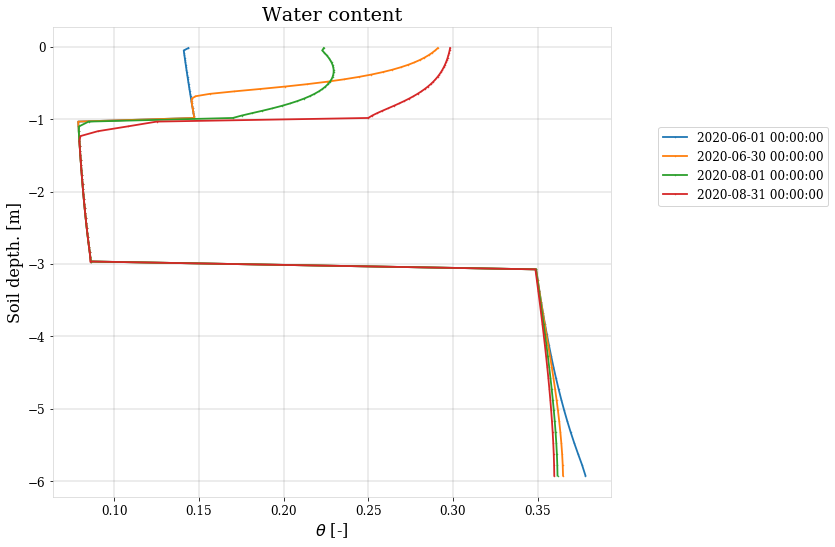

In [19]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.theta.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot top-bottom flux 

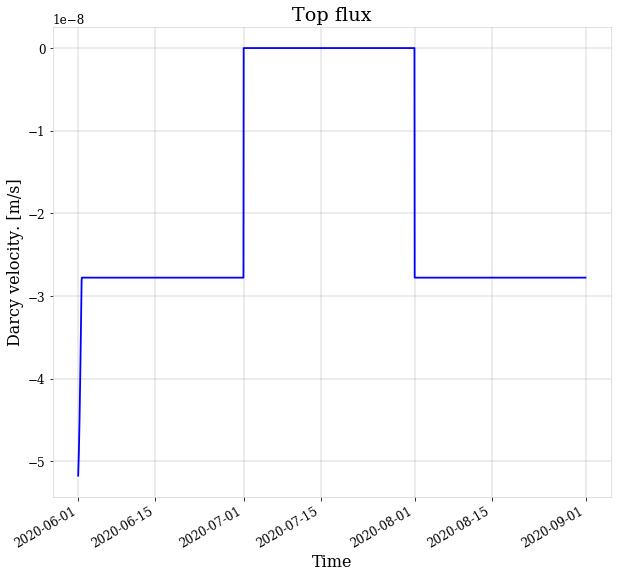

In [20]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[len(ds.dualDepth)-1], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

All'inizio dell'infiltrazione la velocità di Darcy è di circa $-5.2\,10^{-8}m/s$ mentre, una volta iniziata la precipitazione si stabilizza ad un valore costante di circa $-2.8\,10^{-8}m/s$ per poi arrivare a 0 nel mese di stop.

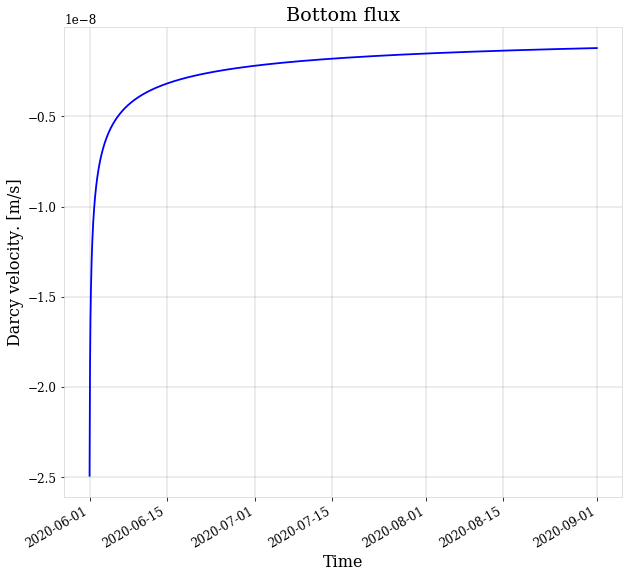

In [21]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[0], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot Error 

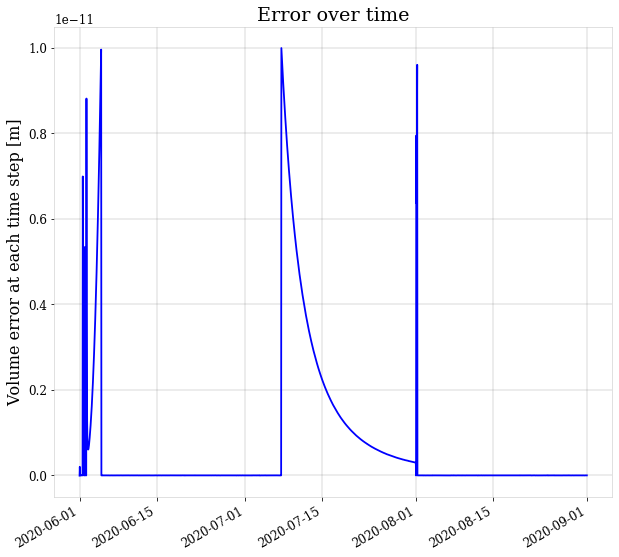

In [22]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.error.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Import your NetCDF file

In [23]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\output')
os.listdir()

['.DS_Store',
 'Integrate PDE',
 'WHETGEO_1205_0000.nc',
 'WHETGEO_1205_2_0000.nc',
 'WHETGEO_1305_0000.nc',
 'WHETGEO_1305_es2_0000.nc',
 'WHETGEO_bomba01_0000.nc',
 'WHETGEO_bomba01_new_0000.nc',
 'WHETGEO_bomba02_0000.nc',
 'WHETGEO_bomba03_0000.nc',
 'WHETGEO_bomba04_0000.nc',
 'WHETGEO_doppiofrontizio_0000.nc',
 'WHETGEO_doppiofrontizio_1perm_0000.nc',
 'WHETGEO_doppiofrontizio_2perm_0000.nc',
 'WHETGEO_doppiofrontizio_3imp_0000.nc',
 'WHETGEO_doppiofrontizio_4perm_0000.nc',
 'WHETGEO_frontizio01_0000.nc',
 'WHETGEO_frontizio02_0000.nc',
 'WHETGEO_frontizio03_0000.nc',
 'WHETGEO_frontizio04_0000.nc']

In [24]:
file_name = 'WHETGEO_bomba02_0000.nc'

In [25]:
ds1 = xr.open_dataset(file_name,engine='scipy')
ds1

<xarray.Dataset>
Dimensions:        (depth: 81, dualDepth: 81, time: 697)
Coordinates:
  * depth          (depth) float64 -5.925 -5.775 -5.625 ... -0.05 -0.01667 0.0
  * dualDepth      (dualDepth) float64 -6.0 -5.85 -5.7 ... -0.06667 -0.03333 0.0
  * time           (time) datetime64[ns] 2020-06-01 ... 2020-06-30
Data variables:
    psi            (time, depth) float64 ...
    psiIC          (depth) float64 ...
    T              (depth) float64 ...
    theta          (time, depth) float64 ...
    darcyVelocity  (time, dualDepth) float64 ...
    waterVolume    (time, depth) float64 ...
    error          (time) float64 ...
    topBC          (time) float64 ...
    bottomBC       (time) float64 ...
    runOff         (time) float64 ...
    controlVolume  (depth) float64 ...
Attributes:
    Description_of_the_problem:         grid:  data/Grid_NetCDF/Richards_coup...
    Top_boundary_condition:              
    Bottom_boundary_condition:           
    path_top_boundary_condition:        

## Precipitation Timeseries

In [26]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\data\\Timeseries')
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'All_0.csv',
 'All_0_2020.csv',
 'bomba_10mm.csv',
 'data.csv',
 'doppiofrontizio.csv',
 'frontizio_01mm.csv',
 'LAI_sin.csv',
 'Prec.csv',
 'Prec_out_13.csv',
 'Prec_out_5m.csv',
 'prova.csv',
 'save.csv',
 'save15.csv',
 'savees.csv']

In [27]:
file_name = 'bomba_10mm.csv' 

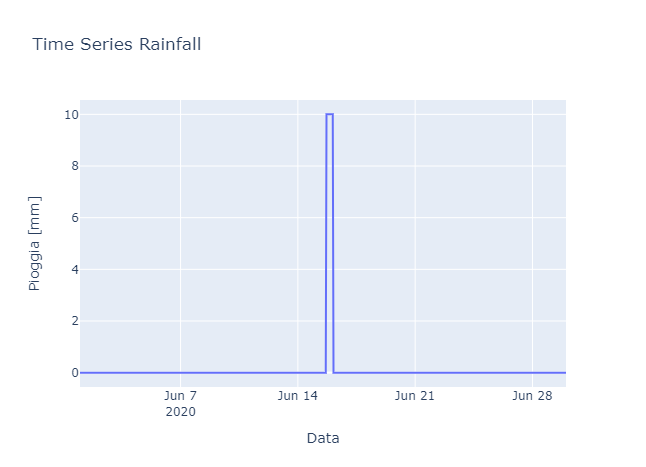

In [28]:
kl = pd.read_csv(file_name,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Data'
kl.columns.values[1] = 'Pioggia [mm]' 
fig = px.line(kl, x='Data', y='Pioggia [mm]', title='Time Series Rainfall')
fig.show()

## Plot water suction $\psi$

 ### Intial condition for water suction $\psi$

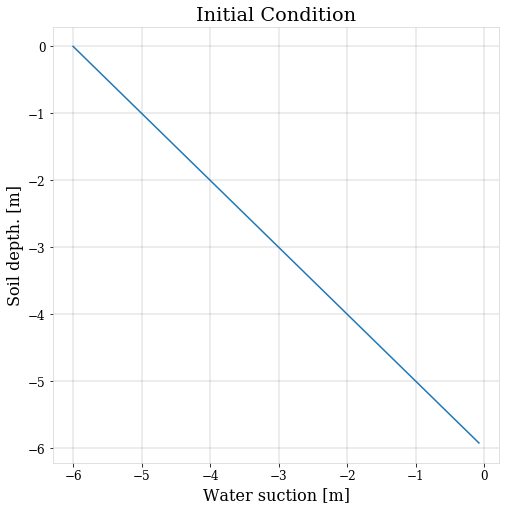

In [29]:
fig = plt.figure(figsize=(8,13/1.62))
ds1.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]') 
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

 ### Water suction $\psi$ among the soil depth in your simulation  

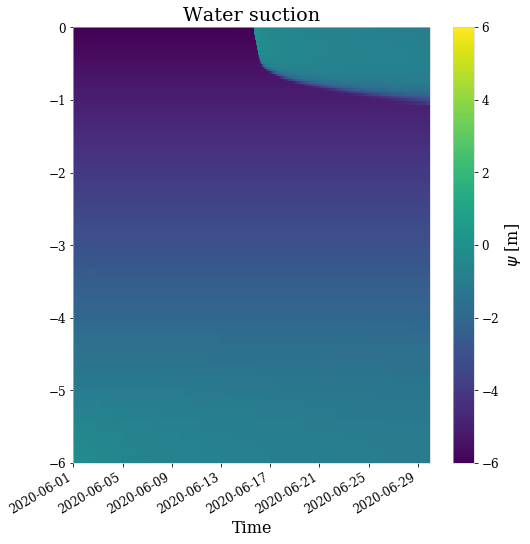

In [30]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds1.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')

La condizione si mantiene pressochè idrostatica lungo tutta la durata del mese negli strati più profondi, menre nel <b>loam</b> è visibile un veloce aumento di suzione in corrispondenza dell'intensa precipitazione.

## Plot water content  $\theta$

 ### Water content $\theta$ among the soil depth in your simulation

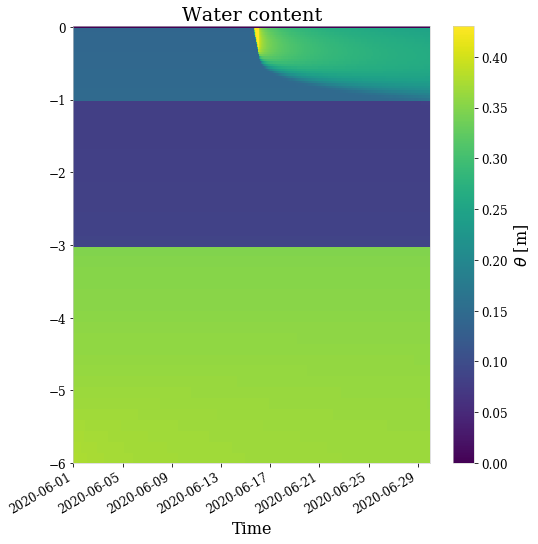

In [31]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds1.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')


Qui si è considerata la colonna di suolo completamente satura, per cui i contenuti d'acqua iniziali sono quelli a saturazione. In corrispondenza della precipitazione intensa si nota un aumento di contenuto d'acqua nel primo strato di suolo.

### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [32]:
myDate = ['2020-06-01 00:00:00','2020-06-15 17:00:00','2020-06-16 04:00:00','2020-06-30 00:00:00']

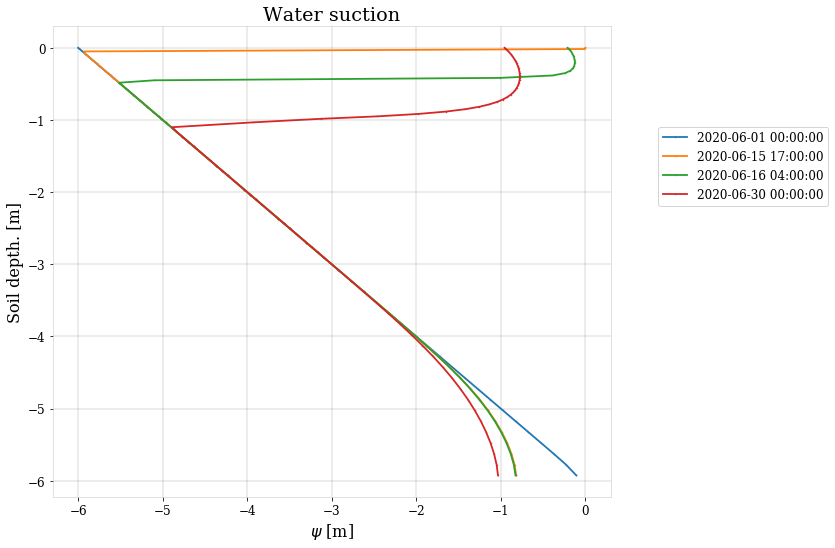

In [33]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds1.psi.sel(time=myDate[i],).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

Vengono plottati gli andamenti di suzione rispettivamente <font color="blue">prima dell'inizio della precipitazione</font>, <font color="orange">dopo un'ora di precipitazione intensa</font>, <font color="green">dopo 12 ore di precipitazione intensa</font> e <font color="red">a fine mese</font>.

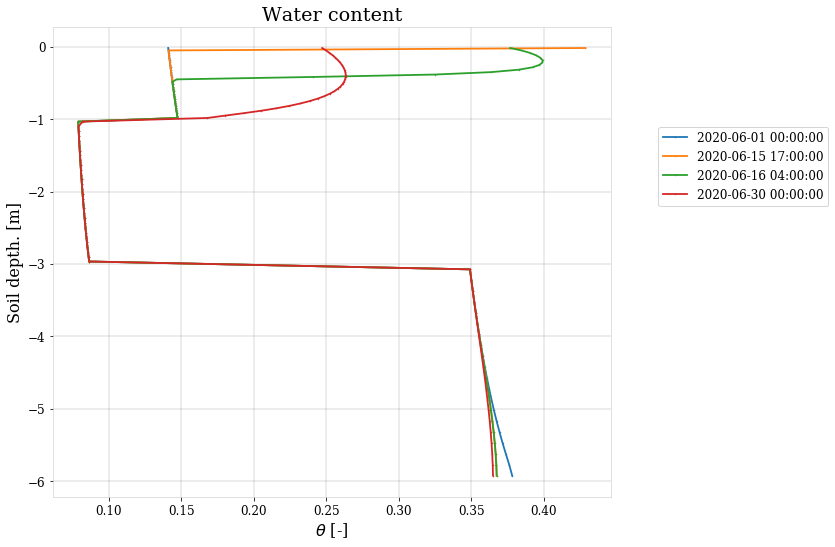

In [34]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds1.theta.sel(time=myDate[i],depth=ds1.depth.values[0:len(ds1.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot top-bottom flux 

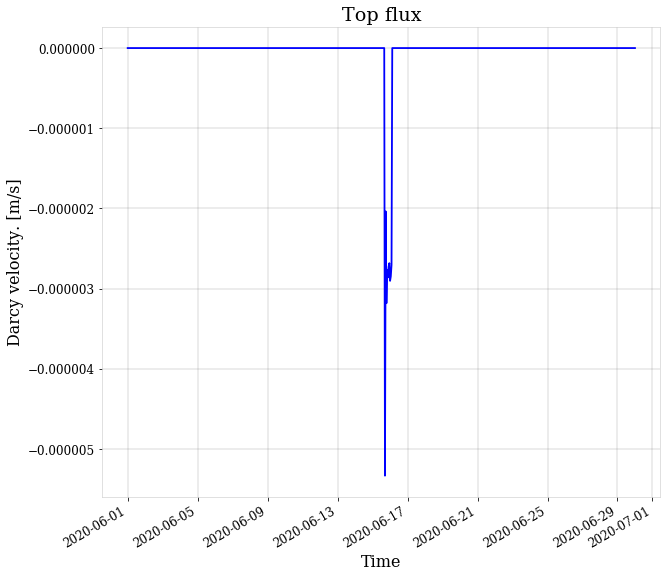

In [35]:
fig = plt.figure(figsize=(10,14/1.618))
ds1.darcyVelocity.sel(dualDepth=ds1.dualDepth[len(ds1.dualDepth)-1], time=ds1.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

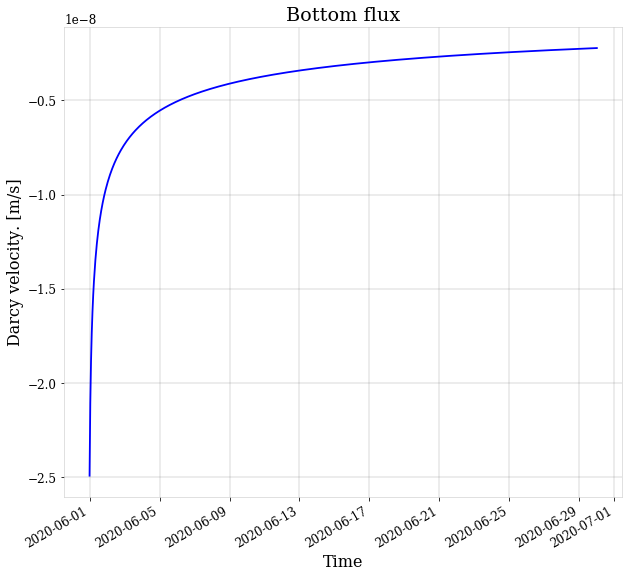

In [36]:
fig = plt.figure(figsize=(10,14/1.618))
ds1.darcyVelocity.sel(dualDepth=ds1.dualDepth[0], time=ds1.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot Error 

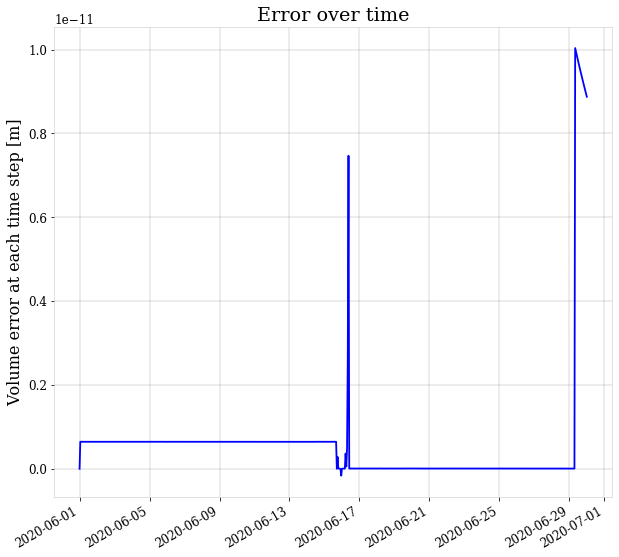

In [37]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds1.error.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)## Plot Error 